# Unsupervised Learning 

## Module 1: Clustering
In this module we will learn about the most common method of unsupervised learning, clustering, its differet types and how to evaluate each type

### Learning Activity: Loading the Python libraries

First you need to load the required Python libraries. Libraries are extensions to the base python that add functionality or help to make tasks more convenient to do. 

In [3]:
# compatibility with python2 and 3
from __future__ import print_function, division

# numerical capacity
import scipy as scipy
import numpy as np
import pandas as pd

# matplotlib setup
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

# plotly setup
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.tools import FigureFactory as FF
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode()

# the tools we will use from SKLEARN

# GENERAL SKLEARN TOOLS
from sklearn import preprocessing, metrics
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

# UNSUPERVISED LEARNING MODULE
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score

# DTS and RFS MODULE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# SVM MODULE
from sklearn.svm import SVC

C:\Users\Osman\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

C:\Users\Osman\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



### The dataset

The dataset we will be using throughout this workshop is an *adapted and aggregated* version of the online retail case study, available from the UCI Machine Learning repository (https://archive.ics.uci.edu/ml/datasets/Online+Retail). The dataset has been designed for this workshop with the purpose of modelling the behaviour of customers ("returning" vs. "non-returning" customers) based on their activity (such as balance, max spent and number of orders, among others).

### Learning Activity: Importing the data

As a first step we load the dataset from the provided `retail_data.csv` file with `pandas`. To achieve this you will use the `.read_csv()` method from Pandas. We just need to point to the location of the dataset and indicate under what name we want to store the data, i.e. `retail`. 

Once the data has been loaded, you can look at the first few instances using the `.head()` method.

In [4]:
# Import the data and explore the first few rows
retail = pd.read_csv('data/retail_data.csv', index_col='CustomerID')
header = retail.columns.values
retail.head()
retail_numpy = np.array(retail)

### Learning Activity: Split the data into input features, X, and outputs, y

Subsequently, we need to split our initial dataset into the data matrix _X_ (independent variable) and the associated class vector _y_ (dependent or target variable). The input features, _X_,  are the variables that you use to predict the outcome. In this data set, there are ten input features stored in columns 1-10 (index 0-9, although the upper bound is not included so the range for indexing is 0:10), all of which have continuous values. The output label, _y_, holds the information of whether the customer has returned or not ("yes" vs. "no"), and is stored in the final (eleventh) column (index 10). To split the data, we need to assign the columns of the input features and the columns of the output labels to different arrays:

In [5]:
# Split to input matrix X and class vector y
X  = retail_numpy[:,:-1].astype(float)
Y = retail_numpy[:,-1]
# Print the dimensions of X and y
print("X dimensions:", X.shape)
print("Y dimensions:", Y.shape)

# Explore X and y if you want to make sure it corresponds to what you expect


X dimensions: (1998L, 10L)
Y dimensions: (1998L,)


In [6]:
# Convert the categorical to numeric values, and print the y frequencies
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)

In [7]:
# Scale the input data 
X = preprocessing.scale(X)

In [8]:
# Create an enhanced scatter plot of the first two features

f1 = 0
f2 = 1

# Returning customers (class "1") represented with orange x
trace1 = Scatter(
    x=X[Y == 1, f1],
    y=X[Y == 1, f2],
    mode='markers',
    name='Returning customers ("1")',
    marker=dict(
        color='orange',
        symbol='x'
    )
)

# Non-returning customers (class "0") represented with blue circles
trace2 = Scatter(
    x=X[Y == 0, f1],
    y=X[Y == 0, f2],
    mode='markers',
    name='Non-returning customers ("0")',
    marker=dict(
        color='blue',
        symbol='circle'
    )
)

layout = Layout(
    xaxis=dict(title=header[f1]),
    yaxis=dict(title=header[f2]),
    height= 600,
)

fig = dict(data=[trace1, trace2], layout=layout)

iplot(fig)

### Clustering with K-Means

K-means clustering is a method for finding clusters and cluster centres in a set of unlabelled data. Intuitively, we might think of a cluster as comprising a group of data points whose inter-point distances are small compared with the distances to points outside of the cluster. Given an initial set of K centres, the K-means algorithm alternates the two steps:

- for each centre we identify the subset of training points (its cluster) that is closer to it than any other centre;

- the mean of each feature for the data points in each cluster are computed, and the corresponding vector of means becomes the new centre for that cluster.

These two steps are iterated until the centres no longer move or the assignments no longer change. Then, a new point x can be assigned to the cluster of the closest prototype.

### Learning Activity: Run K-Means with two features

Isolate the features `mean_spent` and `max_spent` (remember to index and slice the correct columns of the X `numpy` array), then run the K-Means algorithm on the resulting dataset using K=2 and visualise the result.

* KMeans is a class that generates a kmeans model with a number of clusters
* the `.fit` method adapts the cluster centres
* the `.predict` method can be used to determine how the trained model classifies data

In [9]:
# Apply k-means with 2 cluster using a subset of the features (mean_spent and max_spent)
# Remember to index and slice the correct columns of the X numpy array
# Use the fitted model to predict what the cluster of each customer should be
# Apply k-means with 2 cluster using a subset of the features
# (mean_spent and max_spent)

Xsub = X[:,1:3]
n_clusters = 2

kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(Xsub)

# use the fitted model to predict what the cluster of each customer should be
cluster_assignment = kmeans.predict(Xsub)
cluster_assignment

array([1, 0, 0, ..., 0, 0, 0])

In [10]:
# Visualise the clusters using a scatter plot (or scatterplot matrix if you wish)
data = [
    Scatter(
        x = Xsub[cluster_assignment == i, 0],
        y = Xsub[cluster_assignment == i, 1],
        mode = 'markers',
        name = 'cluster '+ str(i)
    ) for i in range(n_clusters)
]

layout = Layout(
    xaxis = dict(title = 'max_spent'),
    yaxis = dict(title = 'mean_spent'),
    height= 600,
)

fig = dict(data = data, layout = layout)

iplot(fig)

### Test Activity - Run K-Means with all the features
Run K-Means using all the features available and visualise the result in the subspace created by `mean_spent` and `max_spent`.

In [11]:
# Adapt the code to run KMeans with 2 clusters but using all features this time
Xsub = X[:,:]
n_clusters = 2

kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(Xsub)

# use the fitted model to predict what the cluster of each customer should be
cluster_assignment = kmeans.predict(Xsub)
cluster_assignment

array([0, 1, 1, ..., 1, 1, 1])

In [12]:
data = [
    Scatter(
        x = Xsub[cluster_assignment == i, 0],
        y = Xsub[cluster_assignment == i, 1],
        mode = 'markers',
        name = 'cluster '+ str(i)
    ) for i in range(n_clusters)
]

layout = Layout(
    xaxis = dict(title = 'max_spent'),
    yaxis = dict(title = 'mean_spent'),
    height= 600,
)

fig = dict(data = data, layout = layout)

iplot(fig)

The result is now different. The first cluster contains customers with a maximum spending close to the minimum mean spending and the second contains customers with a maximum spending far from the minimum mean spending. This way can tell apart customers that could be willing to buy object that cost more than their average spending.

***Question***: Why can't the clusters be separated with a line as before?

### Learning activity - Compare expenditure between clusters

Select the feature `'mean_spent'` (or any feature of your choice) and compare the two clusters obtained above using them. Can you interpret the output of these commands? 

In [13]:
# Compare expenditure between clusters
feat = 1

cluster0_desc = pd.DataFrame(X[cluster_assignment == 0, feat],
                              columns=['cluster0']).describe()

cluster1_desc = pd.DataFrame(X[cluster_assignment == 1, feat],
                              columns=['cluster1']).describe()

compare_df = pd.concat((cluster0_desc, cluster1_desc), axis=1)
compare_df

,cluster0,cluster1
count,423.000000,1575.000000
mean,1.260999,-0.338668
std,1.298119,0.524868
min,-0.760390,-1.139816
25%,0.343639,-0.742627
50%,0.968019,-0.400726
75%,1.831358,-0.062075
max,7.112017,2.667760


### Learning Activity - Compare mean expediture with box plot

Compare the distribution of the feature `mean_spent` in the two clusters using a box plotCan you relate the visualisation with the table above? 

In [14]:
# Create a boxplot of the two clusters for 'mean_spent'
# Create a boxplot of the two clusters for 'mean_spent'

data = [
    Box(
        y = X[cluster_assignment == i, feat],
        name = 'cluster'+ str(i),
    ) for i in range(n_clusters)
]

layout = Layout(
    xaxis = dict(title = "Clusters"),
    yaxis = dict(title = "Value"),
    showlegend=False
)

fig = dict(data = data, layout = layout)

iplot(fig)

### Learning Activity - Compare the mean expenditure distributions

Use the function `create_distplot` from `FigureFactory` to show the
distribution of the mean expenditure in both clusters.


In [15]:
# Compare the mean expediture with a histogram
# Compare mean expediture with a histogram

# Add histogram data
x1 = X[cluster_assignment == 0, feat]
x2 = X[cluster_assignment == 1, feat]

# Group data together
hist_data = [x1, x2]
group_labels = ['Cluster 1', 'Cluster 2']

fig = FF.create_distplot(hist_data, group_labels, bin_size=.2)

iplot(fig)

### Test Activity - Looking at the centroids

Look at the centroids of the clusters `kmeans.cluster_centers_` and check the values of the centers in for the features `'mean_spent', 'max_spent'.

In [16]:
# Add your code here
kmeans.cluster_centers_

array([[ 1.47566019,  1.26099858,  0.89793094, -0.37907161,  1.28302564,
        -0.78700548,  1.40355656, -0.51082185, -0.61406834,  1.47963013],
       [-0.39632017, -0.33866819, -0.2411586 ,  0.1018078 , -0.34458403,
         0.21136719, -0.37695519,  0.13719215,  0.16492121, -0.39738638]])

### Learning Activity - Compute the silhouette score
Compute the silhouette score of the clusters resuting from the application of K-Means.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (``a``) and the mean nearest-cluster distance (``b``) for each sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a, b)``. It represents how similar a sample is to the samples in its own cluster compared to samples in other clusters.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

To compute it apply the `silhouette_score` function with arguments `customers` (the data) and `cluster_assignment` (how your model predicts the classification for the data). 

In [17]:
# Add your code here to print the silhouette score
metrics.silhouette_score(X, cluster_assignment)

0.45152663373747776

***K-Means, pro and cons***

Pro
- fast, if your dataset is big K-Means might be the only option
- easy to understand
- any unseen point can be assigned to the cluster with the closest mean to the point
- many implementations available

Cons
- you need to guess the number of clusters
- clusters can be only globular
- the results depends on the initial choice of the means
- all the points are assigned to a cluster, clusters are affected by noise

### Learning Activity - Affinity Propagation Clustering

`AffinityPropagation` creates clusters by sending messages between pairs of samples until convergence. A dataset is then described using a small number of exemplars, which are identified as those most representative of other samples. The messages sent between pairs represent the suitability for one sample to be the exemplar of the other, which is updated in response to the values from other pairs. This updating happens iteratively until convergence, at which point the final exemplars are chosen, and hence the final clustering is given

Affinity Propagation can be interesting as it chooses the number of clusters based on the data provided. For this purpose, the two important parameters are the preference, which controls how many exemplars are used, and the damping factor.

The main drawback of Affinity Propagation is its complexity. 

In [19]:
# print(__doc__)

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

In [29]:
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


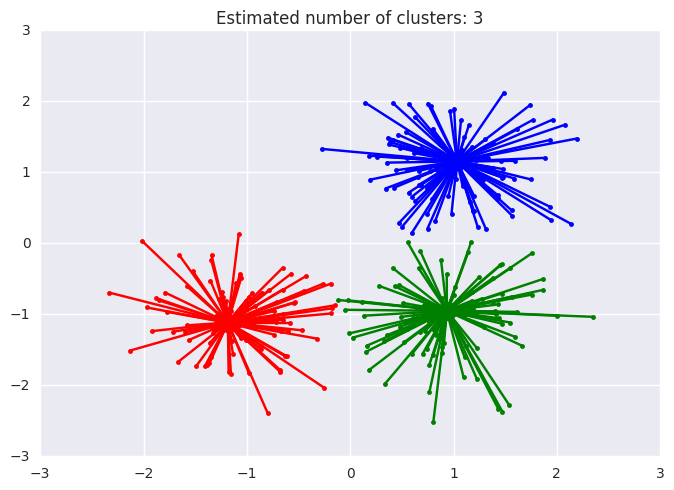

In [30]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Learning Activity - Mean shift Clustering

`MeanShift` clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

The algorithm automatically sets the number of clusters, instead of relying on a parameter `bandwidth`, which dictates the size of the region to search through. This parameter can be set manually, but can be estimated using the provided `estimate_bandwidth` function, which is called if the bandwidth is not set.

The algorithm is not highly scalable, as it requires multiple nearest neighbor searches during the execution of the algorithm. The algorithm is guaranteed to converge, however the algorithm will stop iterating when the change in centroids is small.
Labelling a new sample is performed by finding the nearest centroid for a given sample.

In [24]:
print(__doc__)

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

#Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

Automatically created module for IPython interactive environment


In [25]:
# Compute clustering with MeanShift
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


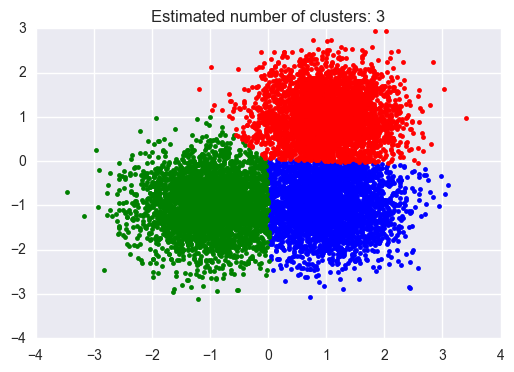

In [26]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Learning Activity - Spectral clustering

`SpectralClustering` does a low-dimension embedding of the affinity matrix between samples, followed by a KMeans in the low dimensional space. It is especially efficient if the affinity matrix is sparse and the pyamg module is installed. SpectralClustering requires the number of clusters to be specified. It works well for a small number of clusters but is not advised when using many clusters.

For two clusters, it solves a convex relaxation of the normalised cuts problem on the similarity graph: cutting the graph in two so that the weight of the edges cut is small compared to the weights of the edges inside each cluster. This criteria is especially interesting when working on images: graph vertices are pixels, and edges of the similarity graph are a function of the gradient of the image.

Automatically created module for IPython interactive environment


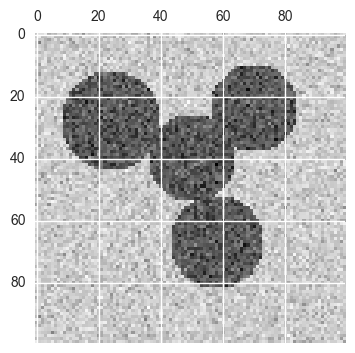

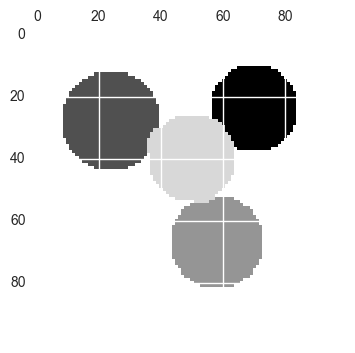

In [28]:
print(__doc__)

# Authors:  Emmanuelle Gouillart <emmanuelle.gouillart@normalesup.org>
#           Gael Varoquaux <gael.varoquaux@normalesup.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

### Learning Activity - Hierarchical clustering

`Hierarchical clustering` is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. See the Wikipedia page for more details.
The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

* Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
* Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
* Average linkage minimizes the average of the distances between all observations of pairs of clusters.

`AgglomerativeClustering` can also scale to large number of samples when it is used jointly with a connectivity matrix, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.

Automatically created module for IPython interactive environment
Computing embedding
Done.
ward : 0.49s
average : 0.43s
complete : 0.46s


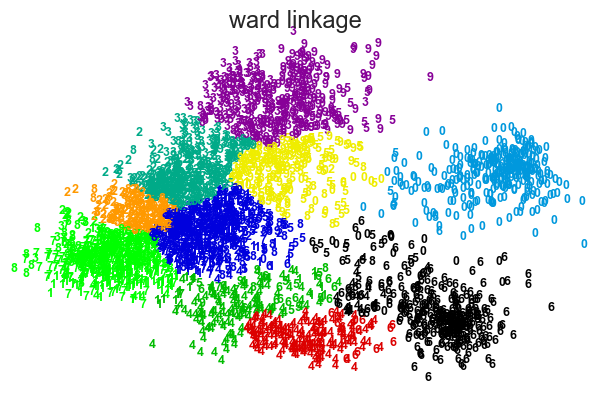

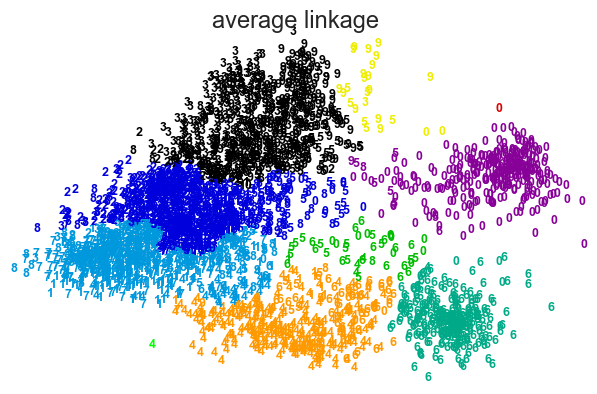

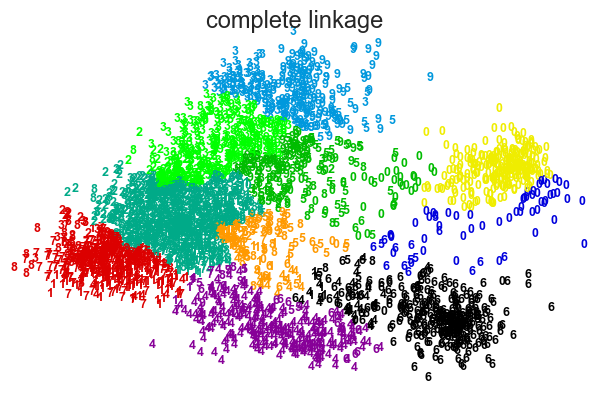

In [29]:
print(__doc__)
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

np.random.seed(0)

def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)


#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s : %.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)


plt.show()

### Learning Activity - DBSCAN

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster.

More formally, we define a core sample as being a sample in the dataset such that there exist min_samples other samples within a distance of eps, which are defined as neighbors of the core sample. This tells us that the core sample is in a dense area of the vector space. A cluster is a set of core samples that can be built by recursively taking a core sample, finding all of its neighbors that are core samples, finding all of their neighbors that are core samples, and so on. A cluster also has a set of non-core samples, which are samples that are neighbors of a core sample in the cluster but are not themselves core samples. Intuitively, these samples are on the fringes of a cluster.

Any core sample is part of a cluster, by definition. Any sample that is not a core sample, and is at least eps in distance from any core sample, is considered an outlier by the algorithm.

In the figure below, the color indicates cluster membership, with large circles indicating core samples found by the algorithm. Smaller circles are non-core samples that are still part of a cluster. Moreover, the outliers are indicated by black points below.


In [32]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


C:\Users\Osman\Anaconda2\lib\site-packages\matplotlib\lines.py:1145: FutureWarning:

comparison to `None` will result in an elementwise object comparison in the future.



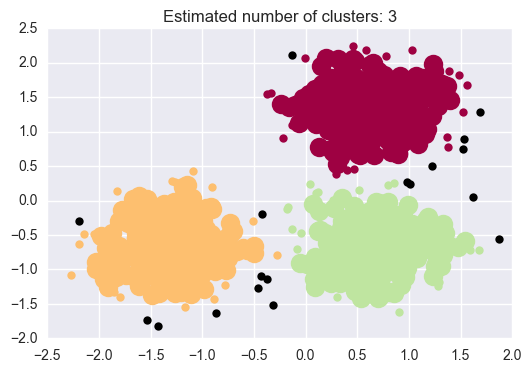

In [33]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Learning Activity - GaussianMixture Clustering (Distributional-based)

The `GaussianMixture` object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models. It can also draw confidence ellipsoids for multivariate models, and compute the Bayesian Information Criterion to assess the number of clusters in the data. A GaussianMixture.fit method is provided that learns a Gaussian Mixture Model from train data. Given test data, it can assign to each sample the Gaussian it mostly probably belong to using the GaussianMixture.predict method.

The GaussianMixture comes with different options to constrain the covariance of the difference classes estimated: spherical, diagonal, tied or full covariance.




Automatically created module for IPython interactive environment


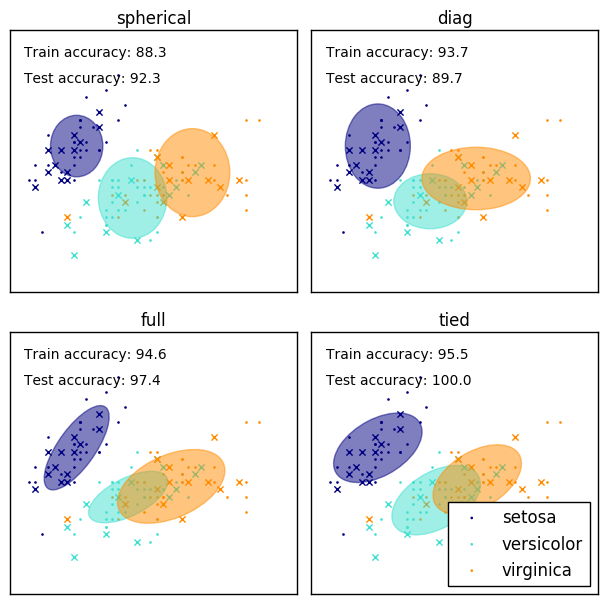

In [1]:


import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = dict((cov_type, GaussianMixture(n_components=n_classes,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()